# **Modelo criado para o curso de Pós Graduação da USP, ICMC, para matéria de redes neurais.**

**Contexto:**
- Foram utilizados dataset imdb-reviews-pt-br.csv que contém avaliações de filmes realizadas no site IMDB, com textos em português e em inglês. 

- Explorando Sentence embedding pré-treinado para multiplos idiomas, e avaliar redes neurais comparando-as com relação aos textos em inglês e português.

**Especificações:** 
A arquitetura seguiu as seguintes camadas por orientação da atividade:



*  normalização em batch
*  densa 256 neurônios, relu
*   densa 256 neurônios, relu
*   normalização em batch
* ativação relu
*  dropout 0.25
*  densa 1 neurônio, sigmoide
















In [ ]:
##instalação da biblioteca
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sentence_transformers import SentenceTransformer

### 2. Carregamento da base

In [ ]:
# ler base de dados
df_model = pd.read_csv("/content/imdb-reviews-pt-br.csv", delimiter=',', engine='python', encoding="ISO-8859-1", error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 25170: unexpected end of data


In [ ]:
df_model.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este Ã© um exemplo do motivo pelo qual a maior...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever mÃºsicas...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latÃ£o nÃ£o Ã© uma palavra ...,neg


### 3. Geração dos embeddings



In [ ]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [ ]:
n_lines = 10000
df = df_model.sample(replace = True, n=n_lines)
df
## trandormando em listas para rodar mais rápido
df_pt = df['text_pt'].tolist()
df_en = df['text_en'].tolist()
clf = df['sentiment']

#embeddings

emb_pt = model.encode(df_pt, batch_size=8, show_progress_bar=True)
emb_en = model.encode(df_en, batch_size=8, show_progress_bar=True)

## base treino e teste

pt_X_train, pt_X_test, pt_y_train, pt_y_test = train_test_split(emb_pt, clf, train_size=0.85, test_size=0.15)
en_X_train, en_X_test, en_y_train, en_y_test = train_test_split(emb_en, clf, train_size=0.85, test_size=0.15)


# negativo e positivo
en_y_test = en_y_test.map({'neg':0,'pos':1})
en_y_train = en_y_train.map({'neg':0,'pos':1})
pt_y_test = pt_y_test.map({'neg':0,'pos':1})
pt_y_train = pt_y_train.map({'neg':0,'pos':1})

Batches:   0%|          | 0/1250 [00:00<?, ?it/s]

Batches:   0%|          | 0/1250 [00:00<?, ?it/s]

In [ ]:
##visualizando o embeddings em en
print(emb_en.shape)
print(emb_en[:10])

(10000, 512)
[[-0.01055936 -0.01349783 -0.03031344 ... -0.028143   -0.01086989
   0.04195174]
 [ 0.00298738 -0.00823034 -0.01446948 ...  0.00813925 -0.04364545
   0.00120013]
 [-0.04544121  0.03618135  0.01823004 ...  0.02519811  0.02488993
   0.00434661]
 ...
 [-0.05329548 -0.0843932  -0.04167342 ... -0.02442601 -0.03897073
   0.00353969]
 [-0.03792619 -0.04442686  0.07192542 ...  0.03369036  0.05246101
   0.05590148]
 [-0.01351899 -0.03701067  0.04262984 ... -0.07553542 -0.01584722
  -0.02344592]]


In [ ]:
##visualizando o embeddings em pt
print(emb_pt.shape)
print(emb_pt[:10])

(10000, 512)
[[-0.02993541 -0.01564427 -0.00873944 ... -0.02084405 -0.03175247
   0.02751677]
 [-0.00527501  0.01627398  0.00502802 ...  0.01127173 -0.07976859
   0.0396011 ]
 [-0.03242599  0.01094793  0.02147505 ...  0.02237262 -0.02391601
   0.02004708]
 ...
 [-0.03715836 -0.05053546 -0.03103821 ... -0.03956783 -0.05792669
   0.01287774]
 [-0.02843846 -0.0502679   0.05773263 ... -0.000827    0.03740837
   0.02295617]
 [ 0.00270171 -0.03628997  0.00262979 ... -0.03447536 -0.02826474
  -0.01186723]]


classificador de sentimento em *inglês*

In [ ]:
## MODELO EM INGLES 
seed(1)
set_seed(1)
en_X_train = np.asarray(en_X_train)
input_shape = en_X_train.shape[1]

modeloEN = keras.Sequential()

modeloEN.add(keras.layers.Input(shape= input_shape,))
modeloEN.add(keras.layers.BatchNormalization())
modeloEN.add(keras.layers.Dense(256, activation= 'relu'))
modeloEN.add(keras.layers.Dense(256, activation='relu'))
modeloEN.add(keras.layers.Dense(128, activation='linear'))
modeloEN.add(keras.layers.BatchNormalization())
modeloEN.add(keras.layers.Activation('relu'))
modeloEN.add(keras.layers.Dropout(0.25, name = 'dropout'))
modeloEN.add(keras.layers.Dense(1, activation='sigmoid'))
modeloEN.build(input_shape)
modeloEN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 128)               0

In [ ]:
## UTILIZANDO DECAIMENTO 
from keras.metrics import Precision, Recall, Accuracy
tf.keras.backend.clear_session()
epochs = 25
batch_size = 16

##def scheduler(epoch, lr):
##    return lr * tf.math.exp(-0.075)

##callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)

def scheduler(epoch, lr):
    if epoch <= 0:
      return lr
    else:
      return np.round(lr * tf.math.exp(-0.075),4)

callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)


#compilando o modelo e criando o history

modeloEN.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

modeloEN_hist = modeloEN.fit(x = en_X_train, y = en_y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacklr)

Epoch 1/25
532/532 [==============================] - 4s 6ms/step - loss: 0.4955 - precision: 0.7532 - recall: 0.7464 - accuracy: 0.7601 - lr: 0.0010
Epoch 2/25
532/532 [==============================] - 5s 10ms/step - loss: 0.3695 - precision: 0.8316 - recall: 0.8339 - accuracy: 0.8387 - lr: 9.0000e-04
Epoch 3/25
532/532 [==============================] - 3s 5ms/step - loss: 0.3084 - precision: 0.8649 - recall: 0.8678 - accuracy: 0.8711 - lr: 8.0000e-04
Epoch 4/25
532/532 [==============================] - 3s 5ms/step - loss: 0.2391 - precision: 0.8980 - recall: 0.8971 - accuracy: 0.9014 - lr: 7.0000e-04
Epoch 5/25
532/532 [==============================] - 3s 5ms/step - loss: 0.1814 - precision: 0.9280 - recall: 0.9284 - accuracy: 0.9308 - lr: 6.0000e-04
Epoch 6/25
532/532 [==============================] - 3s 5ms/step - loss: 0.1346 - precision: 0.9421 - recall: 0.9506 - accuracy: 0.9481 - lr: 6.0000e-04
Epoch 7/25
532/532 [==============================] - 3s 5ms/step - loss: 0.107

classificador de sentimento em *português*

In [ ]:
## MODELO EM PORTUGUES
seed(1)
set_seed(1)
pt_X_train = np.asarray(pt_X_train)
input_shape = pt_X_train.shape[1]

modeloPT = keras.Sequential()

modeloPT.add(keras.layers.Input(shape= input_shape,))
modeloPT.add(keras.layers.BatchNormalization())
modeloPT.add(keras.layers.Dense(256, activation= 'relu'))
modeloPT.add(keras.layers.Dense(256, activation='relu'))
modeloPT.add(keras.layers.Dense(128, activation='linear'))
modeloPT.add(keras.layers.BatchNormalization())
modeloPT.add(keras.layers.Activation('relu'))
modeloPT.add(keras.layers.Dropout(0.25, name = 'dropout'))
modeloPT.add(keras.layers.Dense(1, activation='sigmoid'))
modeloPT.build(input_shape)
modeloPT.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 128)               0

In [ ]:
## UTILIZANDO DECAIMENTO 
from keras.metrics import Precision, Recall, Accuracy
tf.keras.backend.clear_session()
epochs = 25
batch_size = 16

##def scheduler(epoch, lr):
##    return lr * tf.math.exp(-0.075)

##callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)

def scheduler(epoch, lr):
    if epoch <= 0:
      return lr
    else:
      return np.round(lr * tf.math.exp(-0.075),4)

callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)


## compilando modelo

modeloPT.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

modeloPT_hist = modeloPT.fit(x = pt_X_train, y = pt_y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacklr)

Epoch 1/25
532/532 [==============================] - 4s 6ms/step - loss: 0.5661 - precision: 0.7131 - recall: 0.6923 - accuracy: 0.7165 - lr: 0.0010
Epoch 2/25
532/532 [==============================] - 3s 5ms/step - loss: 0.4520 - precision: 0.7822 - recall: 0.7687 - accuracy: 0.7846 - lr: 9.0000e-04
Epoch 3/25
532/532 [==============================] - 3s 5ms/step - loss: 0.3789 - precision: 0.8249 - recall: 0.8168 - accuracy: 0.8275 - lr: 8.0000e-04
Epoch 4/25
532/532 [==============================] - 3s 5ms/step - loss: 0.3079 - precision: 0.8649 - recall: 0.8594 - accuracy: 0.8671 - lr: 7.0000e-04
Epoch 5/25
532/532 [==============================] - 3s 6ms/step - loss: 0.2162 - precision: 0.9094 - recall: 0.9059 - accuracy: 0.9108 - lr: 6.0000e-04
Epoch 6/25
532/532 [==============================] - 3s 5ms/step - loss: 0.1792 - precision: 0.9262 - recall: 0.9256 - accuracy: 0.9284 - lr: 6.0000e-04
Epoch 7/25
532/532 [==============================] - 3s 5ms/step - loss: 0.1367

### Avaliação dos modelos: 

In [ ]:
# trazendo as métricas para modelo em ingles
modeloEN.evaluate(en_X_test, en_y_test)

47/47 [==============================] - 1s 4ms/step - loss: 0.7964 - precision: 0.8313 - recall: 0.8313 - accuracy: 0.8360


[0.7964060306549072,
 0.8312757015228271,
 0.8312757015228271,
 0.8360000252723694]

In [ ]:
# trazendo as métricas para modelo em pt
modeloPT.evaluate(pt_X_test, pt_y_test)

47/47 [==============================] - 0s 4ms/step - loss: 0.9648 - precision: 0.7986 - recall: 0.8031 - accuracy: 0.8107


[0.964755117893219, 0.7986013889312744, 0.803094208240509, 0.8106666803359985]

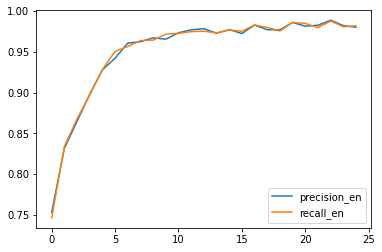

In [ ]:
#plotando grafico com a precisao e recall do modelo em ingles
plt.plot(modeloEN_hist.history['precision'])
plt.plot(modeloEN_hist.history['recall'])
plt.legend(["precision_en", "recall_en", "precision ", "recall "], loc="lower right");

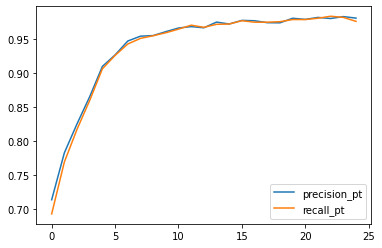

In [ ]:
#plotando grafico com a precisao e recall do modelo em pt
plt.plot(modeloPT_hist.history['precision'])
plt.plot(modeloPT_hist.history['recall'])
plt.legend(["precision_pt", "recall_pt", "precision ", "recall "], loc="lower right");

<function matplotlib.pyplot.legend(*args, **kwargs)>

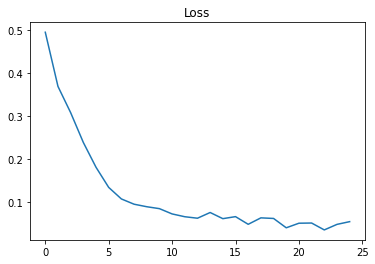

In [ ]:
#grafico com a perda do modelo em ingles
from keras.metrics import Precision, Recall, Accuracy  
plt.title('Loss')
plt.plot(modeloEN_hist.history['loss'], label = 'train')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

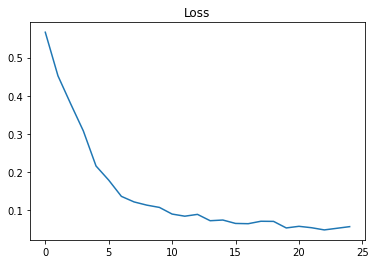

In [ ]:
## grafico com a perda do modelo em portugues
from keras.metrics import Precision, Recall, Accuracy  
plt.title('Loss')
plt.plot(modeloPT_hist.history['loss'], label = 'train')
plt.legend

### Finetuning do Modelo A usando dados em português

In [ ]:
#congelando a primeira camada - MODELO EM PT
modeloPT.layers[2].trainlable = False 


def scheduler(epoch, lr):
    if epoch <= 0:
      return lr
    else:
      return np.round(lr * tf.math.exp(-0.075),4)

callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)




modeloPT.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.00001),
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

modeloPT_hist_fine = modeloPT.fit(x = pt_X_train, y = pt_y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacklr)

Epoch 1/25
532/532 [==============================] - 4s 5ms/step - loss: 0.0484 - precision_1: 0.9830 - recall_1: 0.9859 - accuracy: 0.9849 - lr: 1.0000e-05
Epoch 2/25
532/532 [==============================] - 3s 5ms/step - loss: 0.0426 - precision_1: 0.9821 - recall_1: 0.9881 - accuracy: 0.9855 - lr: 0.0000e+00
Epoch 3/25
532/532 [==============================] - 3s 5ms/step - loss: 0.0449 - precision_1: 0.9849 - recall_1: 0.9856 - accuracy: 0.9858 - lr: 0.0000e+00
Epoch 4/25
532/532 [==============================] - 3s 6ms/step - loss: 0.0396 - precision_1: 0.9815 - recall_1: 0.9915 - accuracy: 0.9868 - lr: 0.0000e+00
Epoch 5/25
532/532 [==============================] - 4s 7ms/step - loss: 0.0399 - precision_1: 0.9824 - recall_1: 0.9900 - accuracy: 0.9866 - lr: 0.0000e+00
Epoch 6/25
532/532 [==============================] - 3s 5ms/step - loss: 0.0426 - precision_1: 0.9805 - recall_1: 0.9888 - accuracy: 0.9851 - lr: 0.0000e+00
Epoch 7/25
532/532 [==============================] 

In [ ]:
plt.plot(modeloPT_hist_fine.history['precision'])
plt.plot(modeloPT_hist_fine.history['recall'])
plt.legend(["precision_pt", "recall_pt", "precision ", "recall "], loc="lower right");